Taller 4 - métodos computacionales 2

Silvana Archila y Catalina Fuentes

1. Ecuación de Poisson en un disco

c:\Users\Catalina Fuentes\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


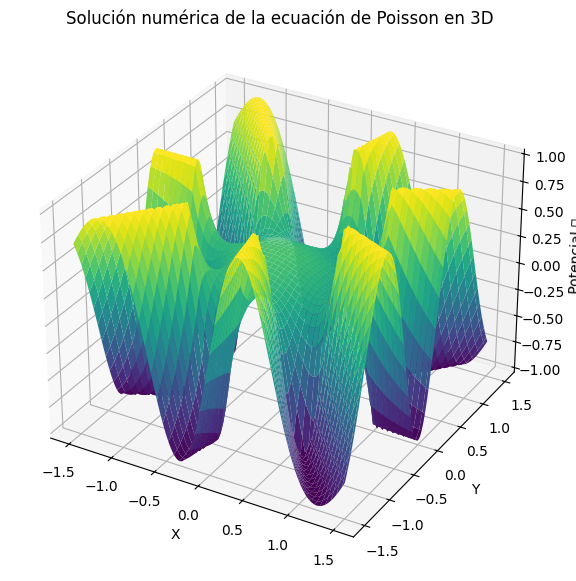

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
N = 100
delta = 1/(N)  # Espaciado entre puntos
delta2 = delta**2  # Espaciado al cuadrado
x = np.linspace(-1.5, 1.5, N)
y = np.linspace(-1.5, 1.5, N)
convergencia = 10**(-4)

phi = np.zeros((N, N))
phi_new = np.zeros((N, N))

# Condiciones iniciales
for i in range(N):
    for j in range(N):
        if x[i]**2 + y[j]**2 > 1:  # Exterior del círculo unitario
            phi[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))  # Condición de frontera
        else:
            phi[i, j] = np.random.random()  # Interior del círculo: inicialización aleatoria

# Evolución del sistema (iteraciones)
for t in range(500):  # Mayor cantidad de iteraciones para alcanzar convergencia
    for i in range(1, N-1):  # Evitar los bordes
        for j in range(1, N-1):
            if x[i]**2 + y[j]**2 < 1:  # Solo actualizar dentro del círculo
                rho = -x[i] - y[j]
                phi_new[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + 4* delta2 * np.pi  * rho) / 4

    # Aplicar las condiciones de frontera nuevamente
    for i in range(N):
        for j in range(N):
            if x[i]**2 + y[j]**2 > 1:  # Exterior del círculo
                phi_new[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))

    # Criterio de convergencia
    if np.max(np.abs(phi_new - phi)) < convergencia:
        print(f'Convergencia alcanzada en {k} iteraciones')
        break

    # Actualizar la matriz phi
    phi = phi_new.copy()

# Graficar la solución en 3D
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, phi_new, cmap='viridis')

# Etiquetas
ax.set_title('Solución numérica de la ecuación de Poisson en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potencial 𝜙')

plt.show()



4. Ecuación de onda bidimensional

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

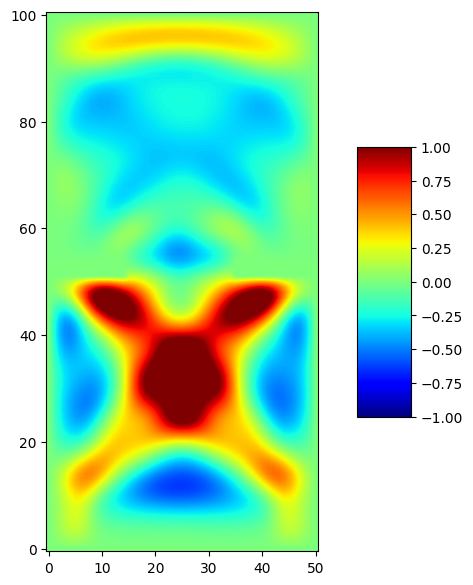

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros
dx = 0.02  # Paso en x
dy = 0.02  # Paso en y
c = 0.5  # Velocidad de la onda
dt = 0.02  # Paso de tiempo
t_max = 3.0  # Tiempo de simulación
x_max = 2.0  # Largo de la caja
y_max = 1.0  # Ancho de la caja

# Malla
nx = int(x_max / dx) + 1
ny = int(y_max / dy) + 1
nt = int(t_max / dt) + 1

# Variables
x = np.linspace(0, x_max, nx)
y = np.linspace(0, y_max, ny)
u = np.zeros((nx, ny))  # u en el tiempo actual
u_new = np.zeros((nx, ny))  # u en el tiempo siguiente
u_old = np.zeros((nx, ny))  # u en el tiempo anterior

# Condición inicial: gaussiana
for i in range(nx):
    for j in range(ny):
        u[i, j] = np.exp(-150 * ((x[i] - 0.4) ** 2 + (y[j] - 0.5) ** 2))

# Condiciones de frontera
def aplicar_condiciones_frontera(u):
    u[0, :] = 0  # Frontera en x=0
    u[-1, :] = 0  # Frontera en x=x_max
    u[:, 0] = 0  # Frontera en y=0
    u[:, -1] = 0  # Frontera en y=y_max

    # Pared con rendija
    for i in range(nx):
        for j in range(ny):
            if (0 < j * dy < 0.3) and (1 < x[i] < 1.1):
                u[i, j] = 0
    for i in range(nx):
        for j in range(ny):
            if (0.7 < j * dy < 1) and (1 < x[i] < 1.1):
                u[i, j] = 0

    return u

# Inicializar la figura para la animación
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.imshow(u, interpolation='bilinear', cmap='jet', origin='lower', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, shrink=0.5, aspect=5)

# Función para actualizar la animación en cada frame
def update_plot(frame):
    global u, u_new, u_old
    # Evitar los bordes
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = (2 * u[i, j] - u_old[i, j] +
                           (c * dt / dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt / dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    # Actualizar las matrices
    u_old = u.copy()
    u = u_new.copy()

    # Aplicar las condiciones de frontera después de la actualización
    aplicar_condiciones_frontera(u)

    # Actualizar la gráfica 2D
    cax.set_data(u)
    return cax,

# Crear la animación
ani = animation.FuncAnimation(fig, update_plot, frames=nt, interval=50, blit=True)

# Guardar la animación como video (formato mp4)
ani.save('simulacion_onda_2D_2d.mp4', writer='ffmpeg')

# Mostrar la animación en pantalla
plt.show()

#toca revisar xq en google collab si crea el video bien y aca no >:v es el mismo codigo. 
#ahorita lo miro uwu
